In [27]:
# Data Manipulation
import pandas as pd
import numpy as np
import random as rnd
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
path = "/Users/patrickhanderhan/code/Used_car_model/training.csv"
car_data = pd.read_csv(path)
pd.set_option('display.max_columns', None)
print(len(car_data))
car_data.head()



72983


,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [29]:
#These cols are mostly empty
df = car_data.drop(["PRIMEUNIT", "AUCGUART"], axis=1)
df.head()

df_new = df.copy()


In [42]:

non_numeric_cols_low_cardinality = ["Make", "Color", "Size", "Transmission", "VNST"]
non_numeric_cols_high_cardinality = ["Model", "Trim", "SubModel"]

numeric_cols = ['VehYear',
                'VehicleAge',
                "MMRCurrentAuctionAveragePrice",
                "MMRAcquisitonRetailCleanPrice",
                "MMRAcquisitionRetailAveragePrice",
                "MMRAcquisitionAuctionCleanPrice",
                "MMRAcquisitionAuctionAveragePrice",
                "MMRCurrentRetailCleanPrice",
                "VehOdo"]

#casting to int and filling null vals
for col in numeric_cols:
    median = df_new[col].median()
    df_new[col] = df_new[col].fillna(median, axis=0)
    df_new[col] = df_new[col].astype(int)

df_new["MMRCurrentRetailCleanPrice"].isnull().sum()

    

np.int64(0)

## Visualizing the data

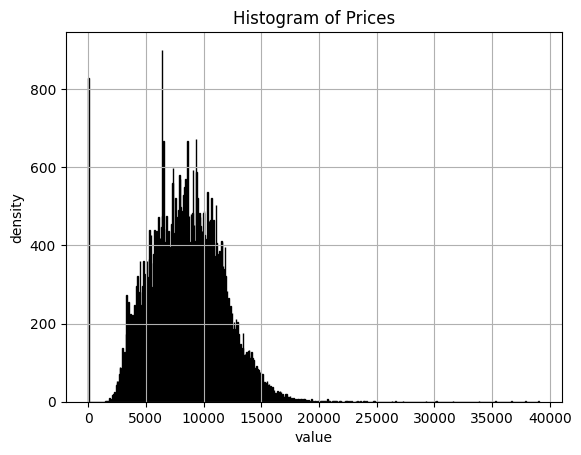

In [31]:
#histogram of prices
prices = df_new["MMRAcquisitionRetailAveragePrice"]
plt.hist(prices, bins=700, color="grey", edgecolor="black",)
plt.xlabel("value")
plt.ylabel("density")
plt.title("Histogram of Prices")
plt.grid(True)
plt.show()

#can see data is skewed to the right with a ton of prices of 0


In [32]:
#Can assume that the large # of zeros can be imputated as it doesnt make sense for a car to auciton at 0$

col = "MMRCurrentRetailCleanPrice"

median = df_new.loc[df_new[col] != 0, col].median() 
df_new[col] = df_new[col].replace(0, median)



Text(0.5, 1.0, 'histogram of Mileage')

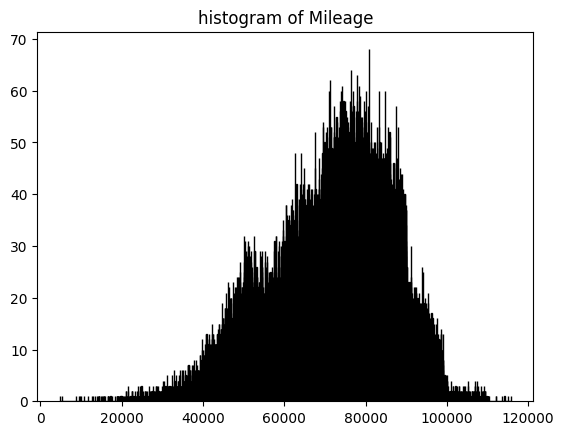

In [33]:
#histogram of mileage


plt.hist(df_new["VehOdo"], bins=5000, color="purple", edgecolor="black")
plt.title("histogram of Mileage")

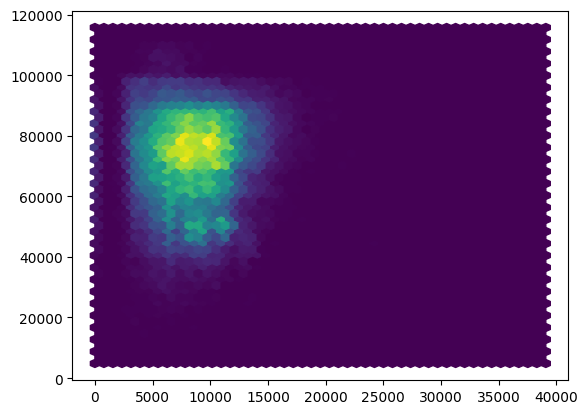

In [34]:
#hexplot of price vs miles
miles = df_new["VehOdo"]
plt.hexbin(prices, miles, gridsize=50)
plt.show()

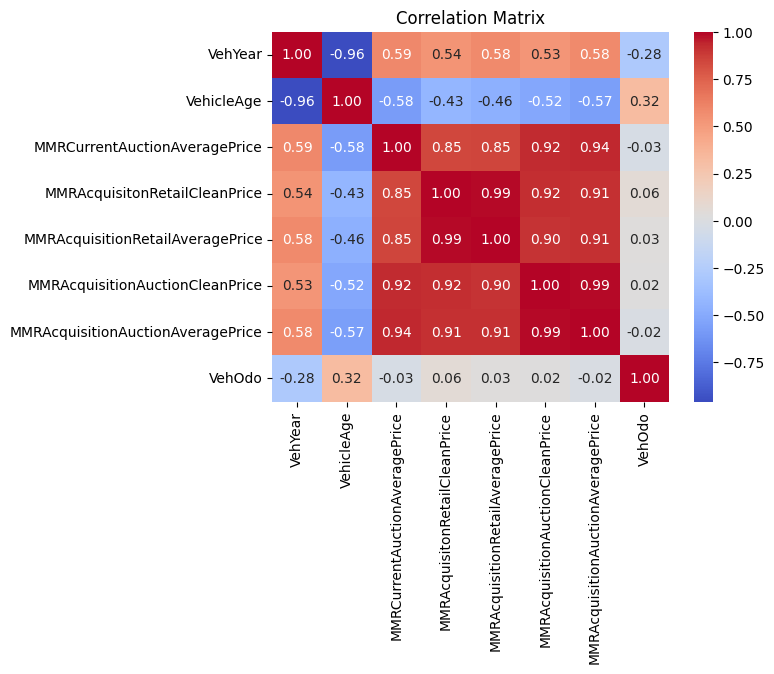

In [35]:
#making correlation chart
corr_matrix = car_data[numeric_cols].corr()
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Selecting features for model


In [ ]:
#we know these have to be helpful
features = ["VehOdo", "VehAge"]

#should split data b4 encoding to avoid leaking
y = df_new["MMRCurrentRetailCleanPrice"]
X = df_new[["Model", "Trim", "SubModel","Make", "Color", "Size", "Transmission", "VNST","VehOdo","VehYear","VehicleAge"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)


# encoding low cardinality
X_train = pd.get_dummies(X_train, columns=non_numeric_cols_low_cardinality, drop_first=True)
X_test = pd.get_dummies(X_test, columns=non_numeric_cols_low_cardinality, drop_first=True)
features.extend(non_numeric_cols_low_cardinality)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
features.extend([col for col in X_train.columns if any(c in col for c in low_card)])


# Target encode high-cardinality
encoder = TargetEncoder(cols=non_numeric_cols_high_cardinality)

encoder = TargetEncoder(cols=non_numeric_cols_high_cardinality)
X_train[non_numeric_cols_high_cardinality] = encoder.fit_transform(X_train[non_numeric_cols_high_cardinality], y_train)
X_test[non_numeric_cols_high_cardinality] = encoder.transform(X_test[non_numeric_cols_high_cardinality])

#encoding changes names of everything

features.extend(non_numeric_cols_high_cardinality)



Index(['Model', 'Trim', 'SubModel', 'VehOdo', 'VehYear', 'VehicleAge',
       'Make_BUICK', 'Make_CADILLAC', 'Make_CHEVROLET', 'Make_CHRYSLER',
       ...
       'VNST_OK', 'VNST_OR', 'VNST_PA', 'VNST_SC', 'VNST_TN', 'VNST_TX',
       'VNST_UT', 'VNST_VA', 'VNST_WA', 'VNST_WV'],
      dtype='object', length=102)


## Training a model


In [ ]:
model = xgb.XGBRegressor(
     n_estimators=500,        
    learning_rate=0.05,      
    max_depth=6,             
    subsample=0.8,           
    colsample_bytree=0.8,    
    random_state=42,
    n_jobs=-1 
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## evaluating model


In [ ]:
#Useful metrics
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("avg absolute value of distance between prediction and real:", mae)
print("how much variance the model explains:", r2)



avg absolute value of distance between prediction and real 793.6529541015625
how much variance the model explains 0.8678306341171265


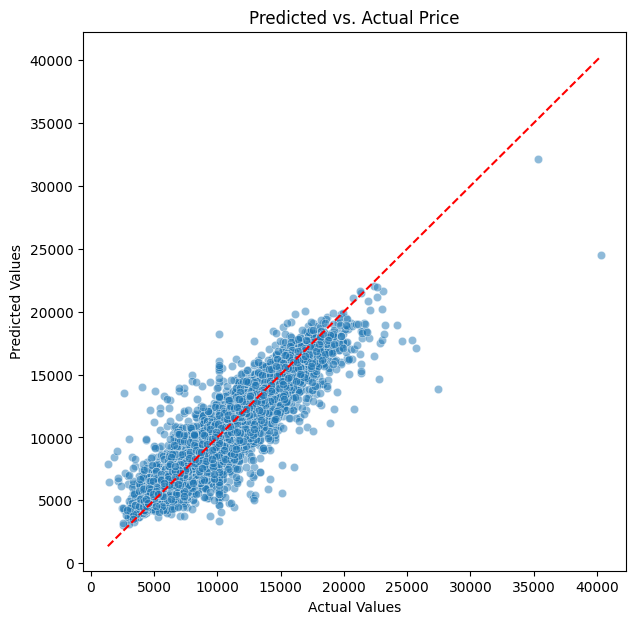

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Price")
plt.show()


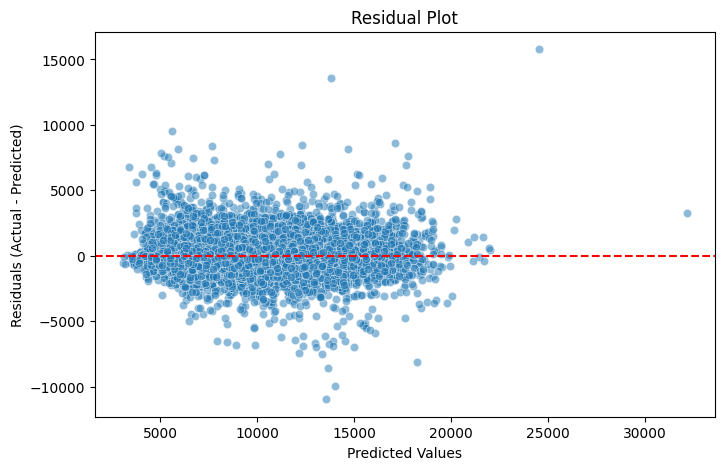

In [71]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

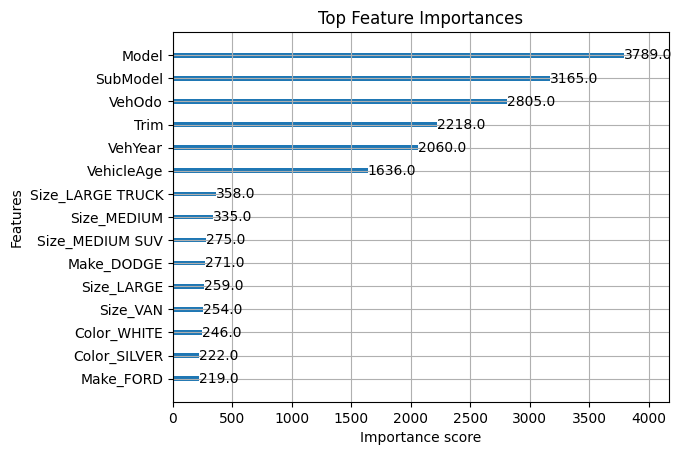

In [72]:
import xgboost as xgb

xgb.plot_importance(model, max_num_features=15)
plt.title("Top Feature Importances")
plt.show()
